Code usinng for removing the last column:
 for i in *.txt; do rev $i | cut -d$'\t' -f 2- | rev > $i.txt; done

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import ranksums

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)


In [3]:
#Originial center
center = np.loadtxt("CLL-center.txt")

In [4]:
list_to_run = ["9568",
"21597",
"22663",
"29896",
"5807",
"22158",
"15032",
"24046",
"25067",
"26099",
"19252",
"20307",
"24830",
"28047",
"28066",
"28476",
"29593",
"8372",
"9531",
"19328",
"20268",
"25451",
"29842",
"29876",
"5071",
"17988",
"8385",
"8485",
"20121",
"29881",
"30089",
"29860",
"5832",
"6541",
"7420",
"7725",
"13045",
"13088",
"19830",
"19833",
"20706",
"24215",
"25424",
"26129",
"6535",
"19303",
"22936",
"23172",
"30034",
"8604",
"9444",
"9462",
"15030",
"20218",
"24196",
"28856",
"18140",
"18515",
"19494",
"19633",
"24084",
"25664",
"26450",
"28707",
"7495",
"19256",
"15058",
"9422",
"16331",
"20735",
"23184",
"24242",
"24793",
"9343",
"21741",
"24477",
"26207",
"29515",
"5121",
"18736",
"28032",
"14470",
"16327",
"20424",
"7805",
"19363"]

In [5]:
len(list_to_run)

86

In [6]:

cluster = [6,18,28,44,73,87,25,70,12,15,17,24,56,96,46,58,93,14,74,1,81]

In [7]:
output = []

In [8]:
record = []

In [9]:
proportion = []

In [12]:
for a in list_to_run:

    data = pd.read_csv("Testing/"+a+".txt.txt",sep = "\t")
    #data = data.to_numpy()

    #train kmeans with new data
    data = data.to_numpy()
    kmeans = KMeans(n_clusters=100,init=center, random_state=0, max_iter=2)
    kmeans.fit(data)
    label = kmeans.labels_
    L = label.shape
    
    
    
    #record the number of cells in each clusters
    (unique, counts) = np.unique(label, return_counts=True)
    frequencies = np.asarray((unique, counts)).T

    #calculate tumor burden
    s = 0
    for c in cluster:
        s = frequencies[c][1]+s
    output.append(s/L)
    
    #calculate total cell number
    
    #cell cluster proportion calculation
    freqlist = np.empty([1,100])
    for f in frequencies:
        np.append(freqlist,f[1]/L)
    record.append(frequencies)
    proportion.append(freqlist)

In [13]:
a = [float(i) for i in output]
a

[0.77284,
 0.03558,
 0.01253,
 0.00524,
 0.02475,
 0.08205,
 0.03046,
 0.07517,
 0.00614,
 0.07725,
 0.0225,
 0.03599,
 0.23842,
 0.00401,
 0.01005,
 0.00362,
 0.0117,
 0.06313,
 0.00761,
 0.0125,
 0.00999,
 0.00318,
 0.01728,
 0.21410676823431166,
 0.01263,
 0.00349,
 0.01614,
 0.0113,
 0.02903,
 0.028808963930971564,
 0.26513,
 0.04401,
 0.1397,
 0.00705,
 0.37440503882904486,
 0.04954,
 0.01068,
 0.01169,
 0.02139,
 0.42849,
 0.00667,
 0.28704,
 0.00375,
 0.00418,
 0.01036,
 0.01056,
 0.77419,
 0.00575,
 0.01687,
 0.01710333064859999,
 0.00497,
 0.03548,
 0.01064,
 0.41645,
 0.00345,
 0.39749,
 0.3945,
 0.01846,
 0.08312,
 0.34502,
 0.0631,
 0.01781,
 0.00628,
 0.05042,
 0.01308,
 0.00848,
 0.03799,
 0.25056,
 0.00371,
 0.11831,
 0.00488,
 0.00888,
 0.35997,
 0.18266,
 0.06918,
 0.09832,
 0.00298,
 0.03279,
 0.08297,
 0.01112,
 0.00574,
 0.02894,
 0.00191,
 0.72227,
 0.02637,
 0.42867]

In [14]:
machine = [0.77284,
 0.03558,
 0.01253,
 0.00524,
 0.02475,
 0.08205,
 0.03046,
 0.07517,
 0.00614,
 0.07725,
 0.0225,
 0.03599,
 0.23842,
 0.00401,
 0.01005,
 0.00362,
 0.0117,
 0.06313,
 0.00761,
 0.0125,
 0.00999,
 0.00318,
 0.01728,
 0.21410676823431166,
 0.01263,
 0.00349,
 0.01614,
 0.0113,
 0.02903,
 0.028808963930971564,
 0.26513,
 0.04401,
 0.1397,
 0.00705,
 0.37440503882904486,
 0.04954,
 0.01068,
 0.01169,
 0.02139,
 0.42849,
 0.00667,
 0.28704,
 0.00375,
 0.00418,
 0.01036,
 0.01056,
 0.77419,
 0.00575,
 0.01687,
 0.01710333064859999,
 0.00497,
 0.03548,
 0.01064,
 0.41645,
 0.00345,
 0.39749,
 0.3945,
 0.01846,
 0.08312,
 0.34502,
 0.0631,
 0.01781,
 0.00628,
 0.05042,
 0.01308,
 0.00848,
 0.03799,
 0.25056,
 0.00371,
 0.11831,
 0.00488,
 0.00888,
 0.35997,
 0.18266,
 0.06918,
 0.09832,
 0.00298,
 0.03279,
 0.08297,
 0.01112,
 0.00574,
 0.02894,
 0.00191,
 0.72227,
 0.02637,
 0.42867]

In [15]:
actual = [0.85,0.02,0,0.003,0,0.065,0,0.065,0.0002,0.136,0,0.0001,0.38,0,0.01,0,0,0.054,0,0,0.0001,0.0005,0.0004,0.26,0,0.0001,0.0001,0,0.0004,0,0.26,0.0008,0.105,0,0.38,0,0,0.011,0.02,0.56,0,0.235,0,0.0001,0,0,0.71,0.0001,0,0,0.004,0,0,0.3,0.0001,0.33,0.4,0.47,0.12,0.43,0.057,0,0.0007,0,0.001,0.006,0.07,0.24,0,0.1,0.00015,0.0042,0.35,0.22,0,0.0087,0.0001,0,0.111,0.01,0,0.016,0.001,0.7,0,0.37]

In [16]:
color_label = []
for a in actual:
    if a < 0.0001:
        color_label.append('k')
    else:
        color_label.append('r') 

In [17]:
np.corrcoef(actual, machine)

array([[1.       , 0.9420088],
       [0.9420088, 1.       ]])

In [18]:
xline = [0,0.85]
yline = [0,0.85]
yvertical = [0.0001, 0.0001]
xvertical = [0, 0.9]

In [19]:
d = {'x':machine,'y':actual}

In [20]:
df = pd.DataFrame(d)

In [21]:
colors = np.where(df["y"]<0.0001,'k','r')

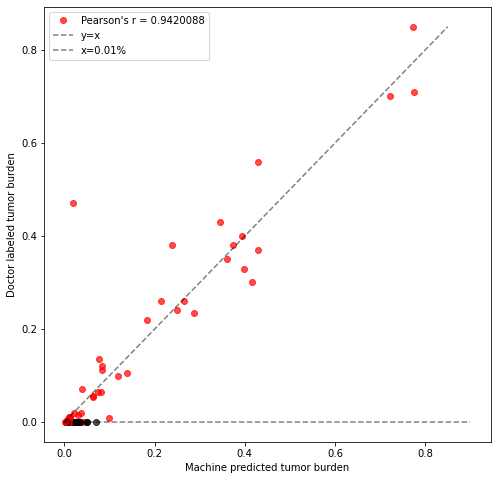

In [22]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

for x,y, color in zip(machine, actual, color_label):
    ax.plot(x,y,'o',color=color, alpha=0.7, picker=True, label = "Pearson's r = 0.9420088")

ax.plot(xline, yline, '--', label='y=x', alpha=0.5, color = 'k')
ax.plot(xvertical, yvertical, '--', label='x=0.01%', alpha=0.5, color = 'k')
plt.xlabel("Machine predicted tumor burden")
plt.ylabel("Doctor labeled tumor burden")

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
#ax.set_xlim(0, 1)
#ax.set_ylim(0, 1)
plt.show()